In [1]:
#slopes plot for 3D plots: extract 3D volume slopes from npz, convert 2D column slopes to 3D
import numpy as np
import yt
import time
from yt.funcs import mylog
import matplotlib.pyplot as plt
mylog.setLevel(40) #prevents warning
plt.style.use('default')
import scipy
from scipy import optimize
import pandas as pd

In [2]:
#get the slopes from the volume density file from Sabrina
inputfile = ('slopes_3D.npz')
plot_data = np.load(inputfile, allow_pickle=True)
slopes = plot_data['ave_slopes']
grav_3D_vol = slopes[0:6]
turbulence_3D_vol = slopes[7:13]
mag_3D_vol = slopes[14:20]
outflows_3D_vol = slopes[21:27]

In [3]:
#load in 2D slopes to be converted
inputfile = ('txt_file_storage/slope_0%_lim1.txt','txt_file_storage/slope_1%_lim1.txt','txt_file_storage/slope_2%_lim1.txt','txt_file_storage/slope_3%_lim1.txt','txt_file_storage/slope_4%_lim1.txt','txt_file_storage/slope_5%_lim1.txt')
for a in range(1):
    slope_x_g = []
    slope_x_gt = []
    slope_x_gtm = []
    slope_x_gtmp = []
    error_x_g = []
    error_x_gt = []
    error_x_gtm = []
    error_x_gtmp = []
    sfe = range(6)
    for ii in range(6):
        #slope cutting. data from txt file chopped into usable form.
        f =open(inputfile[ii])
        newlist = [i for i in f]
        string = newlist[0]
        string1 = string.split("[")[1]
        string2 = string1.split("]")[0]
        string3 = string2.split(",")
        string3 = np.array(string3)
        slope_list = string3.astype('float')
        slope_x_g.append(slope_list[0+a])
        slope_x_gt.append(slope_list[3+a])
        slope_x_gtm.append(slope_list[6+a])
        slope_x_gtmp.append(slope_list[9+a])

In [4]:
#2D slopes conversion
slope_1 =slopes
for d in range(28):
    slope_1[d] = -2/(1-3/slopes[d])
grav_2D_vol = slope_1[0:6]
turbulence_2D_vol = slope_1[7:13]
mag_2D_vol = slope_1[14:20]
outflows_2D_vol = slope_1[21:27]

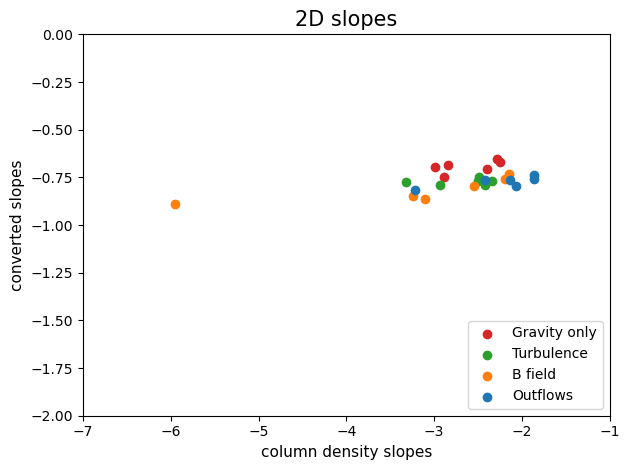

In [11]:
#plot comparisons of 2D and 3D
plt.scatter(slope_x_g,grav_2D_vol,color = 'C3')
plt.scatter(slope_x_gt,turbulence_2D_vol,color = 'C2')
plt.scatter(slope_x_gtm,mag_2D_vol,color = 'C1')
plt.scatter(slope_x_gtmp,outflows_2D_vol,color = 'C0')
plt.legend(['Gravity only', 'Turbulence', 'B field', 'Outflows'], loc = 'lower right')

#plot bells and whistles
plt.title('2D slopes', size = 15)
plt.xlabel('column density slopes', size=11)
plt.ylabel('converted slopes', size=11)
plt.ylim(-2,0)
plt.xlim(-7,-1)
#plt.legend(['volume slope gravity', 'column converted slope gravity', 'volume slope turbulence', 'column converted slope turbulence','volume slope magnetic', 'column converted slope magnetic', 'volume slope outflows', 'column converted slope outflows'])
plt.tight_layout()

In [35]:
len(slope_x_g)

6